#Practica-Minería-de-Datos-KDD-y-Algoritmos
##Proceso KDD con clustering jerarquico y k-means
###Integrantes:
#### Faubla Ordoñez Evelyn
#### Casanova Castro Diego
#### Gonzalez Saltos Johan
-----

:##1. Selección y comprensión de datos

In [ ]:
#Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster


##Análisis exploratorio inicial
###Incluye estadísticas descriptivas, dimensiones y primeras observaciones del dataset


In [ ]:
# Cargamos el dataset con los datos del excel
df = pd.read_excel("dataset-notas-estudiantes.xlsx")

# Dividir la única columna en múltiples columnas
df = df['Nombre,Matematicas,Ciencias,Espanol,Historia,Deportes'].str.split(',', expand=True)

# Asignar nombres a las columnas
df.columns = ['Nombre', 'Matematicas', 'Ciencias', 'Espanol', 'Historia', 'Deportes']

display(df.head())

df.info()

display(df.describe())

display(df)

,"Nombre,Matematicas,Ciencias,Espanol,Historia,Deportes"
0,"Lucia,7,6.5,9.2,8.6,8"
1,"Pedro,7.5,9.4,7.3,7,7"
2,"Ines,7.6,9.2,8,8,7.5"
3,"Luis,5,6.5,6.5,7,9"
4,"Andres,6,6,7.8,8.9,7.3i"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 1 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Nombre,Matematicas,Ciencias,Espanol,Historia,Deportes  27 non-null     object
dtypes: object(1)
memory usage: 348.0+ bytes


,"Nombre,Matematicas,Ciencias,Espanol,Historia,Deportes"
count,27
unique,26
top,"Pedro,7.5,9.4,7.3,7,7"
freq,2


,"Nombre,Matematicas,Ciencias,Espanol,Historia,Deportes"
0,"Lucia,7,6.5,9.2,8.6,8"
1,"Pedro,7.5,9.4,7.3,7,7"
2,"Ines,7.6,9.2,8,8,7.5"
3,"Luis,5,6.5,6.5,7,9"
4,"Andres,6,6,7.8,8.9,7.3i"
5,"Ana,78,9.6,77,80,6.5"
6,"Carlos,6.3,6.4,-8.2,9,7.2"
7,"Jose,7.9,-97,7.5,-80,6"
8,"Sonia,6,6,6.5,5.5,8.7"
9,"Maria,6.8,7.2i,8.7,9,7"


##2. Preprocesamiento de Datos
###Limpieza de Datos
###Transformacion de datos
###Seleccion de caractetristicas


###Se identifican valores erróneos (por ejemplo, notas negativas, valores nulos, NA o outliers). Procederemos a limpiar antes de aplicar los algoritmos

In [ ]:
# Limpieza de valores: Convertir todos los posibles valores erróneos a NaN
df.replace(['NA', 'null'], np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')  # Ignora la columna 'Nombre'

# Permite identificar outliers
df = df[(df >= 0) & (df <= 10) | df.isnull()]  # Notas válidas entre 0 y 10

# Eliminar filas con demasiados valores faltantes
df_clean = df.dropna(thresh=int(len(df.columns) * 0.6))  # Al menos el 60% de las columnas deben estar completas

# Imputar faltantes con la media de la columna
df_filled = df_clean.fillna(df_clean.mean())

# Eliminar la columna 'Nombre'
df_final = df_filled.drop(columns=['Nombre'], errors='ignore')

#Normalizacion y estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_final) # X_scaled contiene los datos estandarizados

display(df_final) # df_final muestra los datos antes de la estandarización, pero después de limpieza e imputación

,Matematicas,Ciencias,Espanol,Historia,Deportes
0,7.0,6.500000,9.200000,8.600000,8.00
1,7.5,9.400000,7.300000,7.000000,7.00
2,7.6,9.200000,8.000000,8.000000,7.50
3,5.0,6.500000,6.500000,7.000000,9.00
4,6.0,6.000000,7.800000,8.900000,7.35
6,6.3,6.400000,7.778261,9.000000,7.20
7,7.9,7.456522,7.500000,7.766667,6.00
8,6.0,6.000000,6.500000,5.500000,8.70
9,6.8,7.456522,8.700000,9.000000,7.00
10,7.5,9.400000,7.300000,7.000000,7.00


###Se justifican los criterios de limpieza y transformación. Las calificaciones se normalizan para clusterizar correctamente

##3. Implementación de algoritmos
##3.1 Clustering Jerárquico Aglomerativo
###Implementacion Correcta
###Dendrograma
###Justificacion de parametros


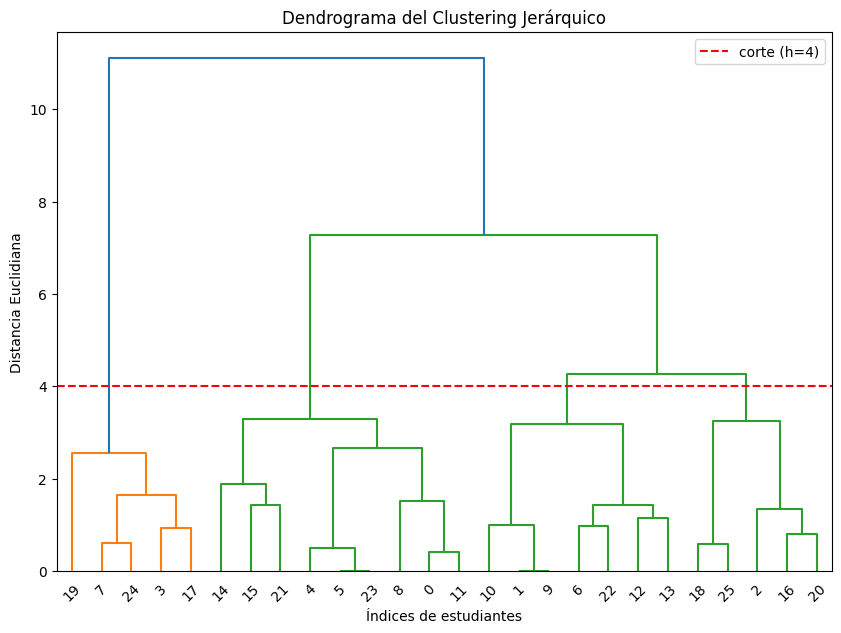

Cluster assignment: [2 2 2 1 2 2 2 1 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 1 2]


In [ ]:
# Calcular la matriz de distancias
distance_matrix = pdist(X_scaled)

# Realizar el clustering jerárquico (usando el método 'ward' para minimizar la varianza)
Z = linkage(distance_matrix, method='ward')

# Visualizar el dendrograma
plt.figure(figsize=(10, 7))
dendrogram(Z)

# Punto de corte
h=4 # ajustado segun la necesidad
plt.axhline(y=h, color='r', linestyle='--', label=f'corte (h={h})')

plt.title('Dendrograma del Clustering Jerárquico')
plt.xlabel('Índices de estudiantes')
plt.ylabel('Distancia Euclidiana')
plt.legend()
plt.show()

# Extraer clusters (t=2 especifica 2 clusters - ajustar según h o el número deseado)
clusters = fcluster(Z, t=2, criterion='maxclust')
print('Cluster assignment:', clusters)

###Se utiliza método 'ward' con métrica euclidiana por su capacidad para minimizar la varianza intra-cluster. El dendrograma ayuda a decidir el número óptimo de clusters

##3.2 K-means
###Implementacion Correcta
###Determinacion de K optimo
###Comparacion de inicializaciones


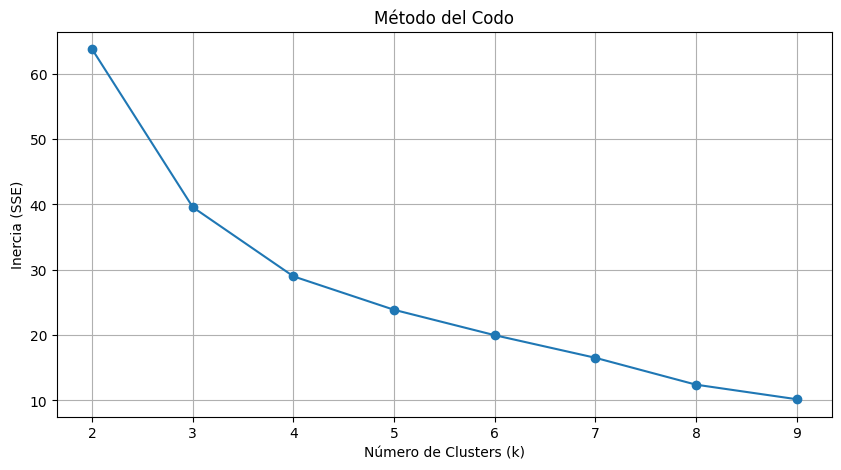

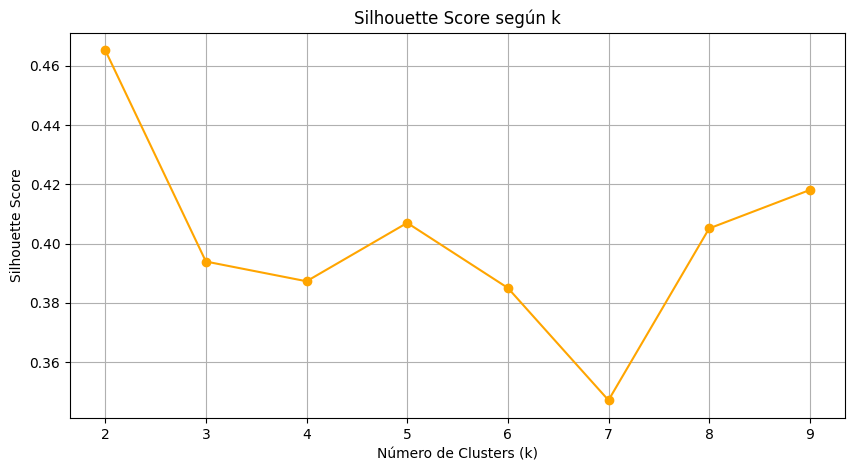

✅ El valor óptimo de k según Silhouette Score es: 2

Tamaño de cada cluster:
Cluster_KMeans
0    20
1     6
Name: count, dtype: int64

Promedio de cada variable por cluster:
                Nombre  Matematicas  Ciencias   Espanol  Historia  Deportes
Cluster_KMeans                                                             
0                  NaN     7.600000  7.883478  8.171739  8.216667  6.955000
1                  NaN     5.466667  6.033333  6.466667  6.266667  8.666667

Silhouette Score del modelo final: 0.465


In [ ]:
# ============================================================
# K-MEANS CON MÉTODO DEL CODO Y ANÁLISIS DE SILHOUETTE
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# ---------------------------
# Funciones auxiliares
# ---------------------------

# Mantener el df original para uso posterior (por ejemplo, añadir etiquetas de clúster)
df_original = df.copy()

# ---------------------------
# 1. Preprocesamiento
# ---------------------------

# Los datos ya se han cargado, limpiado, imputado y escalado en pasos anteriores.
# Usaremos la variable X_scaled de la celda anterior.


# ---------------------------
# 2. Determinar k óptimo
# ---------------------------

inertias = []
silhouettes = []

k_values = range(2, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_scaled, labels))

# Gráfico del método del codo
plt.figure(figsize=(10,5))
plt.plot(k_values, inertias, marker='o')
plt.title("Método del Codo")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Inercia (SSE)")
plt.grid(True)
plt.show()

# Gráfico del Silhouette Score
plt.figure(figsize=(10,5))
plt.plot(k_values, silhouettes, marker='o', color='orange')
plt.title("Silhouette Score según k")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()


# Determinar k óptimo
k_optimo = k_values[np.argmax(silhouettes)]
print(f"✅ El valor óptimo de k según Silhouette Score es: {k_optimo}")

# ---------------------------
# 3. Aplicar K-Means final
# ---------------------------

kmeans_final = KMeans(n_clusters=k_optimo, init='k-means++', n_init=10, random_state=42)
# Ajustar KMeans en los datos escalados
kmeans_final.fit(X_scaled)

# Añadir las etiquetas de clúster al dataframe original (después de limpieza e imputación)
df_filled['Cluster_KMeans'] = kmeans_final.labels_


print("\nTamaño de cada cluster:")
print(df_filled['Cluster_KMeans'].value_counts())

# ---------------------------
# 4. Análisis general
# ---------------------------


print("\nPromedio de cada variable por cluster:")
print(df_filled.groupby('Cluster_KMeans').mean())

print("\nSilhouette Score del modelo final:",
      round(silhouette_score(X_scaled, df_filled['Cluster_KMeans']), 3))

#4. Evaluacion y analisis de resultadoos
###Métricas de evaluación
###Visualizacion de cluster
###Interpretacion de cluster
###Comparacion de algoritmos

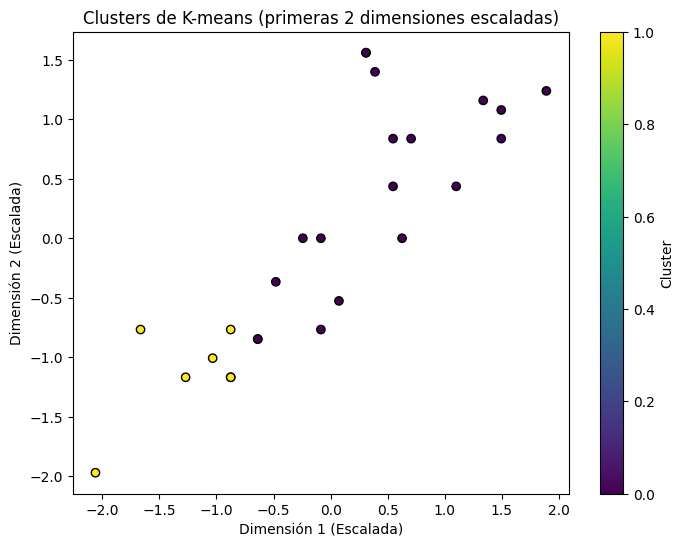

In [ ]:
# Visualización de los clusters de K-means

# Ejemplo de visualización 2D (usando solo las dos primeras columnas escaladas para simplicidad)
if X_scaled.shape[1] >= 2:
    plt.figure(figsize=(8, 6))
    # Usar las etiquetas de clúster del modelo KMeans ajustado
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_final.labels_, cmap='viridis', marker='o', edgecolor='k')
    plt.title('Clusters de K-means (primeras 2 dimensiones escaladas)')
    plt.xlabel('Dimensión 1 (Escalada)')
    plt.ylabel('Dimensión 2 (Escalada)')
    plt.colorbar(label='Cluster')
    plt.show()

In [ ]:
Z = linkage(pdist(X_scaled, metric='euclidean'), method='single')
Z

array([[ 5.        , 23.        ,  0.        ,  2.        ],
       [ 1.        ,  9.        ,  0.        ,  2.        ],
       [ 0.        , 11.        ,  0.41374537,  2.        ],
       [ 4.        , 26.        ,  0.43614697,  3.        ],
       [18.        , 25.        ,  0.59301558,  2.        ],
       [ 7.        , 24.        ,  0.60157398,  2.        ],
       [17.        , 31.        ,  0.80022094,  3.        ],
       [16.        , 20.        ,  0.80994469,  2.        ],
       [10.        , 27.        ,  0.86041723,  3.        ],
       [ 3.        , 32.        ,  0.93578285,  4.        ],
       [ 6.        , 22.        ,  0.98528873,  2.        ],
       [12.        , 13.        ,  1.15504024,  2.        ],
       [ 2.        , 33.        ,  1.15930571,  3.        ],
       [36.        , 37.        ,  1.16515368,  4.        ],
       [ 8.        , 28.        ,  1.25134113,  3.        ],
       [38.        , 39.        ,  1.25641579,  7.        ],
       [34.        , 41.

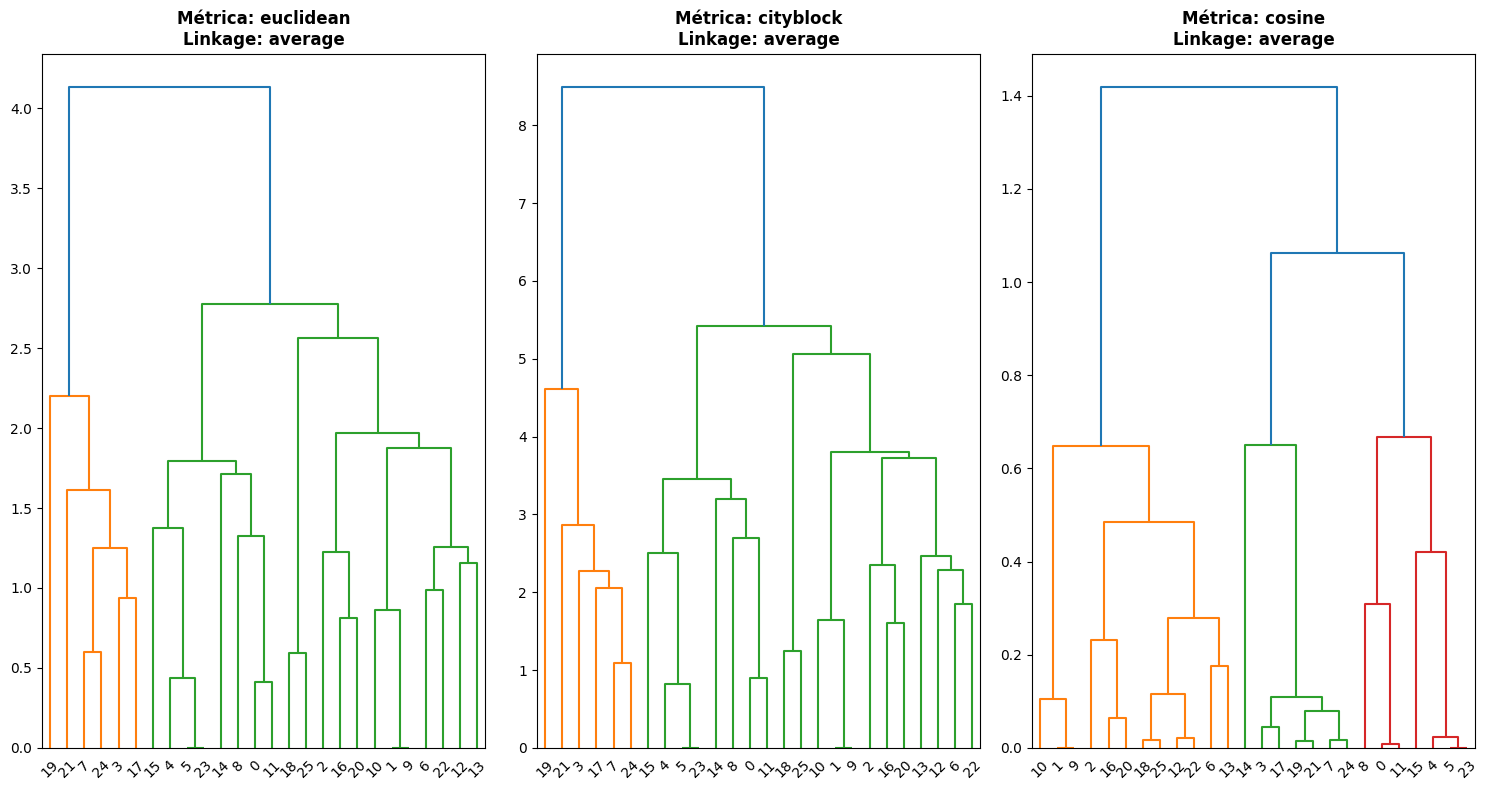

In [ ]:
# Dendrogramas con diferentes métricas y métodos de enlace.

plt.figure(figsize=(15, 8))
for i, metric in enumerate(['euclidean', 'cityblock', 'cosine'], 1):
    # Define el método utilizado para el enlace (linkage)
    method = 'average'
    Z = linkage(pdist(X_scaled, metric=metric), method=method)  # Usa X_scaled y la variable method
    plt.subplot(1, 3, i)
    dendrogram(Z, labels=np.arange(len(X_scaled))) # Usa X_scaled también para las etiquetas
    plt.title(f"Métrica: {metric}\nLinkage: {method}", fontweight='bold')

plt.tight_layout()
plt.show()




In [ ]:
# Métricas de evaluación para K-means
kmeans_labels = kmeans_final.labels_

# Métricas de evaluación para Clustering Jerárquico (usando el mismo número de clusters que K-means para comparación)
hierarchical_labels = fcluster(Z, t=k_optimo, criterion='maxclust')

metrics_data = {
    "K-means": kmeans_labels,
    "Clustering Jerárquico (k=2)": hierarchical_labels
}

for method, labels in metrics_data.items():
    silhouette_avg = silhouette_score(X_scaled, labels)
    davies_bouldin = davies_bouldin_score(X_scaled, labels)
    calinski_harabasz = calinski_harabasz_score(X_scaled, labels)

    print(f"Métricas de evaluación para {method}:")
    print(f"  Silhouette Score: {silhouette_avg:.3f}")
    print(f"  Davies-Bouldin Index: {davies_bouldin:.3f}")
    print(f"  Calinski-Harabasz Index: {calinski_harabasz:.3f}")
    print()

Métricas de evaluación para K-means:
  Silhouette Score: 0.465
  Davies-Bouldin Index: 0.699
  Calinski-Harabasz Index: 24.935

Métricas de evaluación para Clustering Jerárquico (k=2):
  Silhouette Score: 0.337
  Davies-Bouldin Index: 1.099
  Calinski-Harabasz Index: 17.374



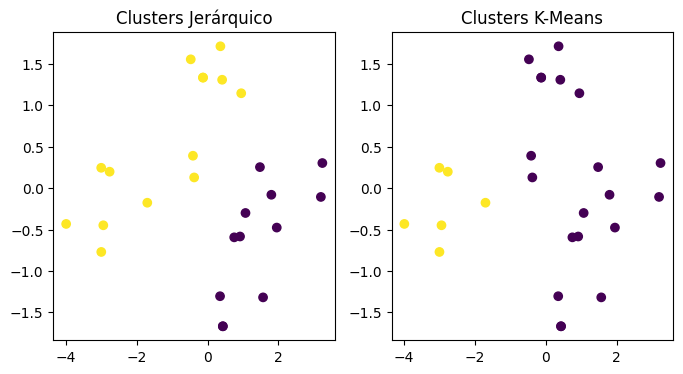

In [ ]:
# Visualización por PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.scatter(X_pca[:,0], X_pca[:,1], c=hierarchical_labels)
plt.title("Clusters Jerárquico")
plt.subplot(1,2,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans_labels)
plt.title("Clusters K-Means")
plt.show()

### Métricas de Evaluación para los Algoritmos de Clustering

Al comparar los resultados entre K-means y Clustering Jerárquico, se ve que K-means funciona mejor para este dataset.
Esto es porque:

Tiene un Silhouette Score más **alto**, lo que significa que los estudiantes dentro de un mismo grupo son más parecidos entre sí y están más separados de los otros grupos.

El índice **Davies-Bouldin** es más bajo en K-means, indicando que los grupos no se mezclan tanto y están más definidos.

El valor de **Calinski-Harabasz** también es mayor, lo que confirma que los clústeres están bien formados y diferenciados.

Lo que nosotros como grupo entendimos es:

**K-means** agrupa mejor, separa bien a los estudiantes y los resultados son más claros y fáciles de interpretar que con el método jerárquico.



### Interpretación de los Clusters

Basado en los resultados del clustering (K-means y/o Jerárquico) y las métricas de evaluación:

*   **Análisis del Cluster 0 (K-means):** Describe las características promedio de los estudiantes en este clúster (por ejemplo, si tienen notas altas o bajas en ciertas materias).
*   **Análisis del Cluster 1 (K-means):** Describe las características promedio de los estudiantes en este otro clúster.
*   **(Opcional) Análisis de otros Clusters:** Si determinaste un número diferente de clusters, describe cada uno.
*   **Observaciones del Clustering Jerárquico:** Comenta lo que observas en el dendrograma y cómo se relaciona con los clusters de K-means (si es aplicable).

### Comparación de Algoritmos (K-means vs. Clustering Jerárquico)

*   **Similitudes:** ¿Los algoritmos identificaron un número similar de clusters? ¿Hay alguna superposición en los miembros de los clusters?
*   **Diferencias:** ¿En qué se diferencian los clusters identificados por cada método? ¿Qué método parece ofrecer una mejor separación o interpretación en este caso?
*   **Métricas de Evaluación:** Compara las métricas (Silhouette, Davies-Bouldin, Calinski-Harabasz) para ambos algoritmos (si están disponibles). ¿Qué métricas sugieren un mejor rendimiento para cada algoritmo?
*   **Justificación:** Basado en la interpretación y las métricas, ¿qué algoritmo consideras más adecuado para este conjunto de datos y por qué?

---

### Resumen Final: Comparación de Algoritmos de Clustering

Basado en el análisis realizado con K-means y Clustering Jerárquico, se identificaron consistentemente dos grupos principales de estudiantes en el conjunto de datos:

1.  *Grupo de Alto Rendimiento Académico:* Primero se muestra el grupo de alto rendimiento academico en las materias, siendo la mayoría de alumnos
2.  *Grupo con Enfoque en Deportes:* Por otro lado, tenemos al grupo de alto rendimiento en deportes, pero bajo rendimiento en materias normales, este grupo es más reducido en comparación al grupo de alto rendimiento academico.

Ambos métodos coincidieron en esta separación natural de los datos. Sin embargo, el algoritmo K-means resultó ser el más apropiado para este caso, ya que permitió una mejor definición de los grupos y obtuvo una validación más sólida a través del Silhouette Score.

---